In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
df = pd.read_csv("housing_sales_large.csv")
stats = df.describe().T[["mean", "50%", "std"]].rename(columns={"50%": "median"})
print("Pandas Summary Statistics:\n")
print(stats)


Pandas Summary Statistics:

                  mean    median            std
id               50.50      50.5      29.011492
price        749021.47  762954.0  283043.038405
bedrooms          3.06       3.0       1.369362
bathrooms         2.44       3.0       1.122047
sqft_living    2380.67    2348.0     875.977700
sqft_lot       5361.53    5551.5    2599.065615
floors            2.09       2.0       0.805223
waterfront        0.10       0.0       0.301511
condition         3.08       3.0       1.454217
year_built     1981.54    1977.0      23.653825
zipcode       98093.08   98103.0      45.628646


In [6]:
price = df["price"].values
print("\nNumPy Price Statistics:")
print("Mean:", np.mean(price))
print("Median:", np.median(price))
print("Standard Deviation:", np.std(price, ddof=1))


NumPy Price Statistics:
Mean: 749021.47
Median: 762954.0
Standard Deviation: 283043.0384048754


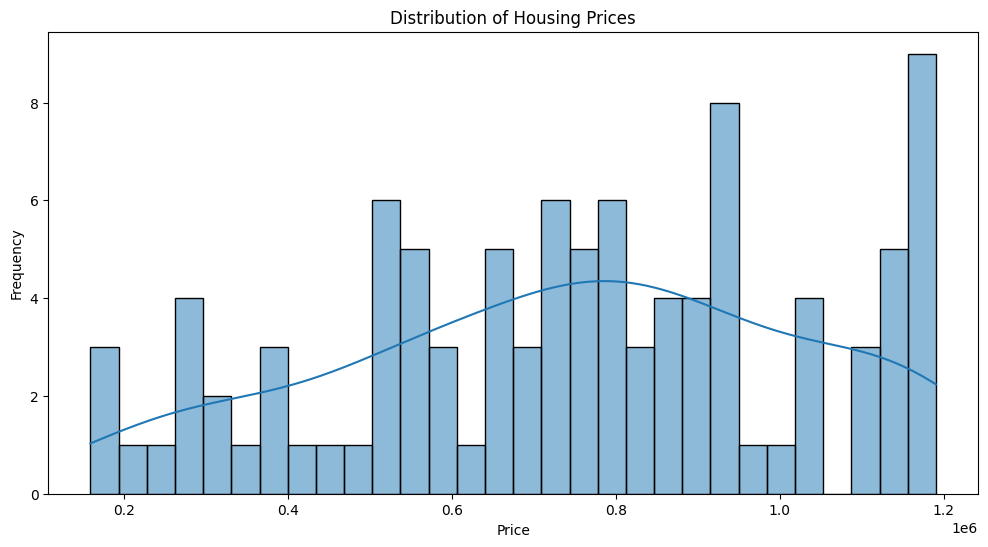

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

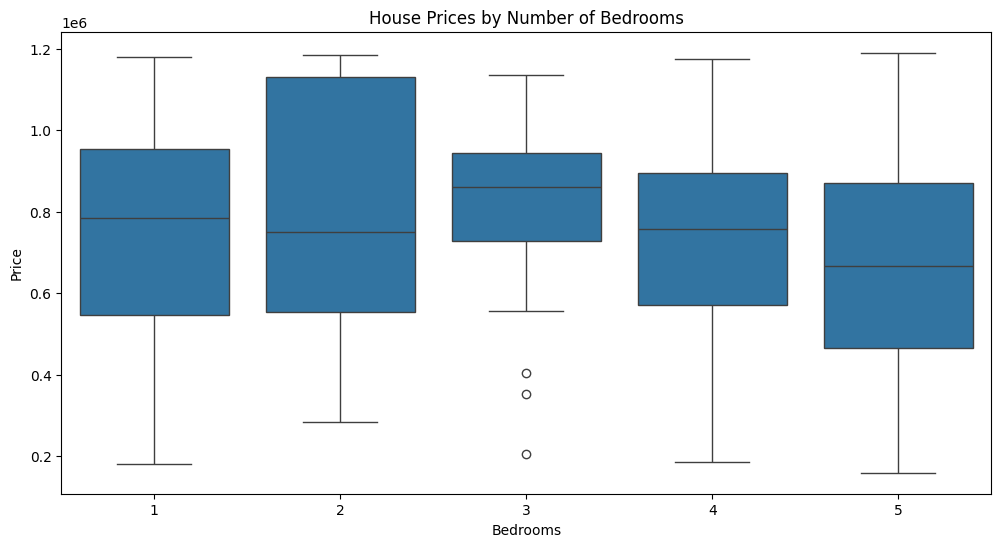

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["bedrooms"], y=df["price"])
plt.title("House Prices by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

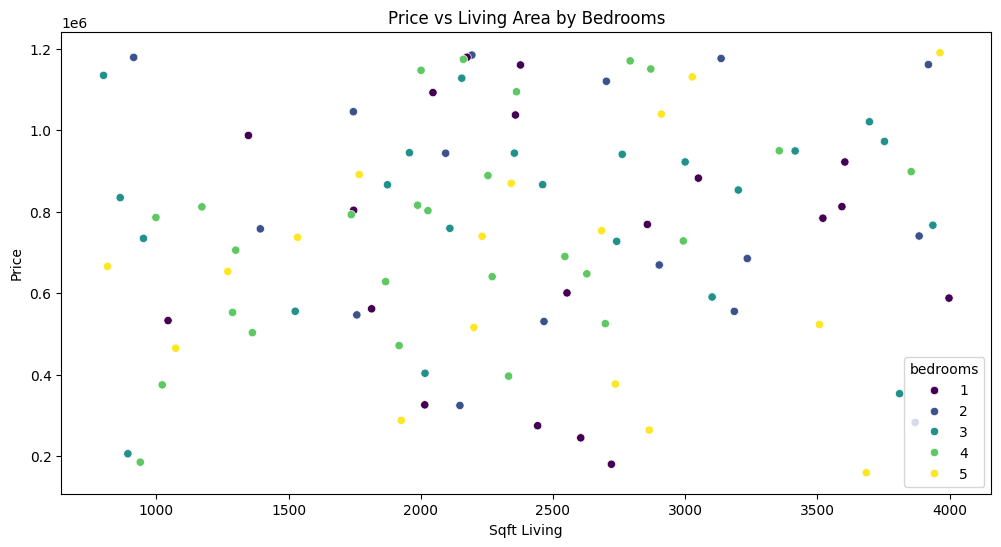

In [9]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x="sqft_living", y="price", data=df, hue="bedrooms", palette="viridis")
plt.title("Price vs Living Area by Bedrooms")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()



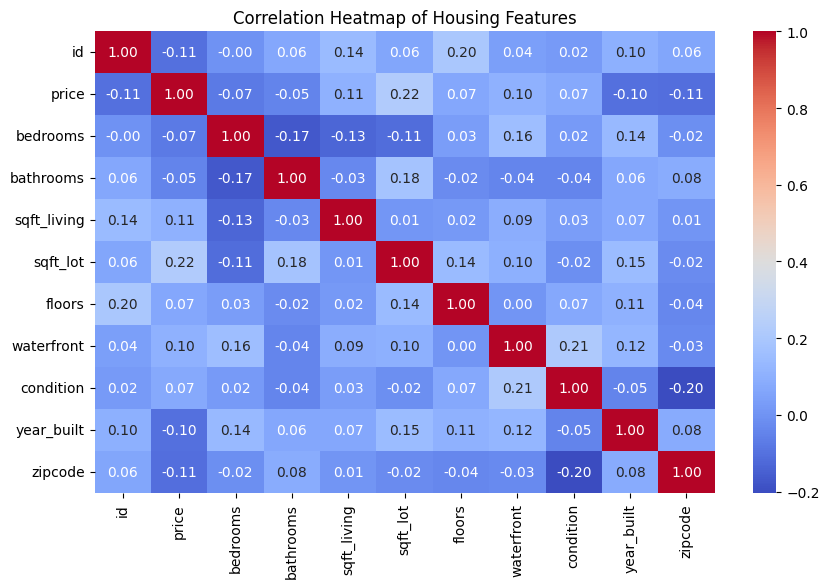

In [11]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Housing Features")
plt.show()

In [12]:
X = df[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "condition", "year_built"]]
y = df["price"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Accuracy Results:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

Model Accuracy Results:
MAE: 241364.75708208
RMSE: 293743.50127260573
R²: 0.07969672508208003
